In [13]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
# from src.folder_handler import *
from src.cort_processor import *
# from src.tdt_support import *
from src.plotter import *
# from src.decoders import *
import math
import pickle
import scipy as spicy
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
# from src.wiener_filter import *
from matplotlib.pyplot import cm
from scipy import signal
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from matplotlib import colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
from astropy.stats import circcorrcoef
from astropy import units as u
import cmath

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
with open('/mnt/c/oobootoo/rat-fes/data/pickles/3-lemons919__session.pkl', 'rb') as inp:
    lem919_session = pickle.load(inp)

with open('/mnt/c/oobootoo/rat-fes/data/pickles/3-meepo919__session.pkl', 'rb') as inp:
    mep919_session = pickle.load(inp)

with open('/mnt/c/oobootoo/rat-fes/data/pickles/3-meepo_regular_923__session.pkl', 'rb') as inp:
    mep923_session = pickle.load(inp)
    
with open('/mnt/c/oobootoo/rat-fes/data/pickles/3-meepo_fast_923__session.pkl', 'rb') as inp:
    mep923f_session = pickle.load(inp)
    
with open('/mnt/c/oobootoo/rat-fes/data/pickles/3-lemons_fast_923__session.pkl', 'rb') as inp:
    lem923f_session = pickle.load(inp)

with open('/mnt/c/oobootoo/rat-fes/data/pickles/3-results-injured-meepolemons1004_lemons_session.pkl', 'rb') as inp:
    lem1004_session = pickle.load(inp)
    
with open('/mnt/c/oobootoo/rat-fes/data/pickles/3-results-injured-meepolemons1004_meepo_session.pkl', 'rb') as inp:
    mep1004_session = pickle.load(inp)

In [15]:
lem919_pred, lem919_act, lem919_corr = lem919_session.decode_phase()
lem919_tsf = np.linspace(0, (lem919_act.shape[0]*50)/1000,lem919_act.shape[0])
lem923f_pred, lem923f_act, lem923f_corr = lem923f_session.decode_phase()
lem923f_tsf = np.linspace(0, (lem923f_act.shape[0]*50)/1000,lem923f_act.shape[0])
mep919_pred, mep919_act, mep919_corr = mep919_session.decode_phase()
mep919_tsf = np.linspace(0, (mep919_act.shape[0]*50)/1000,mep919_act.shape[0])
mep923_pred, mep923_act, mep923_corr = mep923_session.decode_phase()
mep923_tsf = np.linspace(0, (mep923_act.shape[0]*50)/1000,mep923_act.shape[0])
mep923f_pred, mep923f_act, mep923f_corr = mep923f_session.decode_phase()
mep923f_tsf = np.linspace(0, (mep923f_act.shape[0]*50)/1000,mep923f_act.shape[0])
h_sinf = mep923f_session.get_H(H='sin')
h_cosf = mep923f_session.get_H(H='cos')
h_sin = mep923_session.get_H(H='sin')
h_cos = mep923_session.get_H(H='cos')
lem1004_pred, lem1004_act, lem1004_corr = lem1004_session.decode_phase()
lem1004_tsf = np.linspace(0, (lem1004_act.shape[0]*50)/1000,lem1004_act.shape[0])
mep1004_pred, mep1004_act, mep1004_corr = mep1004_session.decode_phase()
mep1004_tsf = np.linspace(0, (mep1004_act.shape[0]*50)/1000,mep1004_act.shape[0])

<bound method Figure.tight_layout of <Figure size 1200x800 with 6 Axes>>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
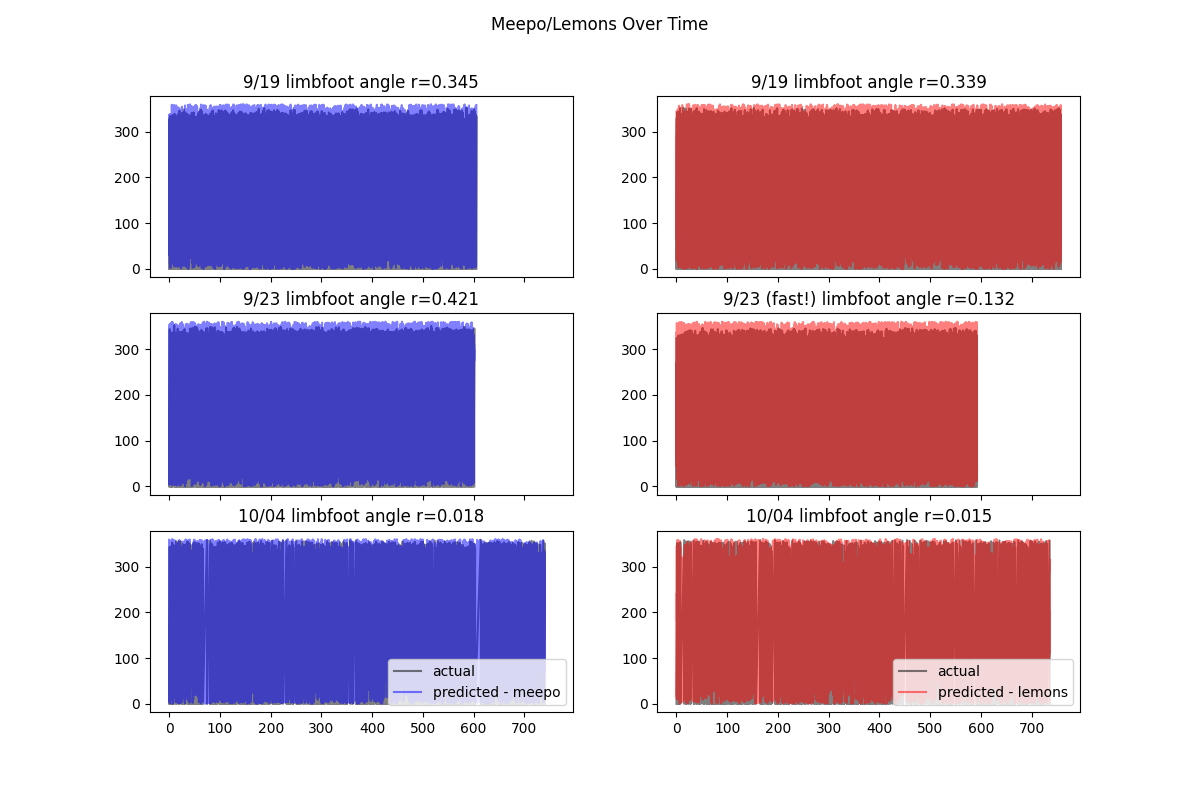

In [16]:
fig512, ax= plt.subplots(3, 2, figsize=(12,8), sharex = True)
fig512.suptitle('Meepo/Lemons Over Time')
ax[0,0].set_title('9/19 limbfoot angle r=' + "{0:.3f}".format(mep919_corr[3]))
ax[0,0].plot(mep919_tsf, mep919_act[:,3], c='k', alpha=0.5, label = "actual")
ax[0,0].plot(mep919_tsf, mep919_pred[:,3], c='b', alpha=0.5, label = "predicted")
ax[1,0].set_title('9/23 limbfoot angle r=' + "{0:.3f}".format(mep923_corr[3]))
ax[1,0].plot(mep923_tsf, mep923_act[:,3], c='k', alpha=0.5, label = "actual")
ax[1,0].plot(mep923_tsf, mep923_pred[:,3], c='b', alpha=0.5, label = "predicted")
ax[0,1].set_title('9/19 limbfoot angle r=' + "{0:.3f}".format(lem919_corr[3]))
ax[0,1].plot(lem919_tsf, lem919_act[:,3], c='k', alpha=0.5, label = "actual")
ax[0,1].plot(lem919_tsf, lem919_pred[:,3], c='r', alpha=0.5, label = "predicted")
ax[1,1].set_title('9/23 (fast!) limbfoot angle r=' + "{0:.3f}".format(lem923f_corr[3]))
ax[1,1].plot(lem923f_tsf, lem923f_act[:,3], c='k', alpha=0.5, label = "actual")
ax[1,1].plot(lem923f_tsf, lem923f_pred[:,3], c='r', alpha=0.5, label = "predicted")
ax[2,0].set_title('10/04 limbfoot angle r=' + "{0:.3f}".format(mep1004_corr[3]))
ax[2,0].plot(mep1004_tsf, mep1004_act[:,3], c='k', alpha=0.5, label = "actual")
ax[2,0].plot(mep1004_tsf, mep1004_pred[:,3], c='b', alpha=0.5, label = "predicted - meepo")
ax[2,1].set_title('10/04 limbfoot angle r=' + "{0:.3f}".format(lem1004_corr[3]))
ax[2,1].plot(lem1004_tsf, lem1004_act[:,3], c='k', alpha=0.5, label = "actual")
ax[2,1].plot(lem1004_tsf, lem1004_pred[:,3], c='r', alpha=0.5, label = "predicted - lemons")
ax[2,1].legend(loc="lower right")
ax[2,0].legend(loc="lower right")

fig512.tight_layout


[0.19046884 0.3534808  0.08887413 0.3208677  0.2102615  0.02475645
 0.19728828]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
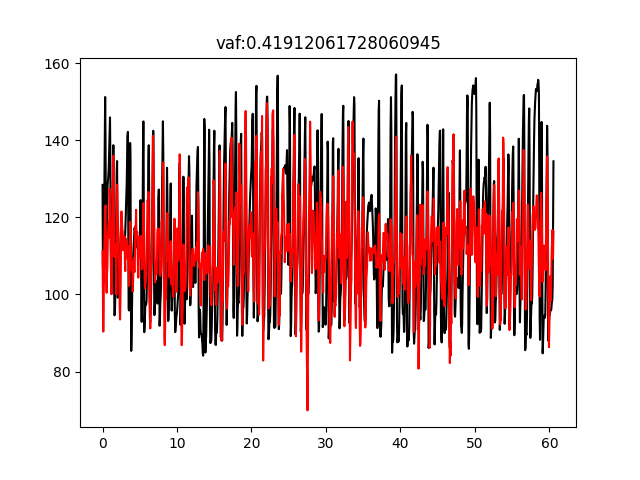

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
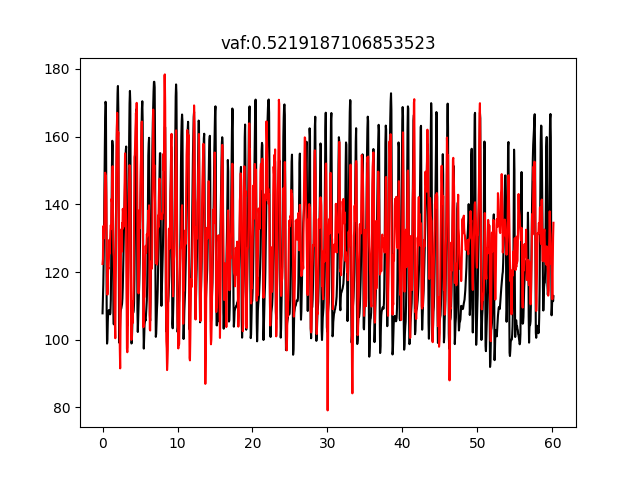

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
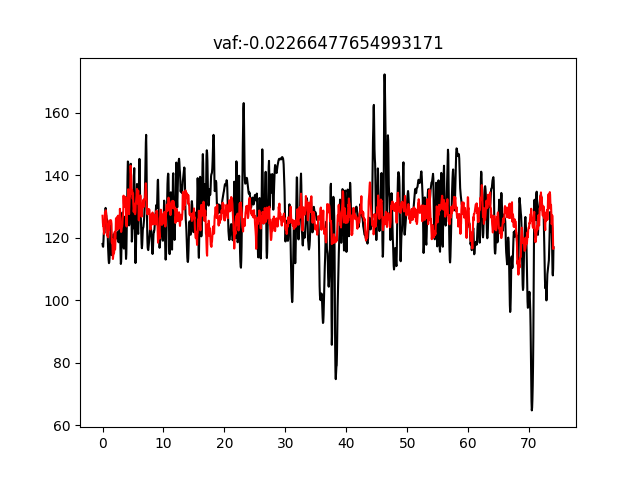

In [5]:
hmep919, vafmep919, testxmep919, testymep919 = mep919_session.decode_angles()
plot_wiener_filter_predic(testxmep919, testymep919[:,3], hmep919[:,3])
print(np.mean(vafmep919, axis = 1))

hmep923, vafmep923, testxmep923, testymep923 = mep923_session.decode_angles()
plot_wiener_filter_predic(testxmep923, testymep923[:,3], hmep923[:,3])

hmep1004, vafmep1004, testxmep1004, testymep1004 = mep1004_session.decode_angles()
plot_wiener_filter_predic(testxmep1004, testymep1004[:,6], hmep1004[:,6])

<bound method Figure.tight_layout of <Figure size 1200x800 with 6 Axes>>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
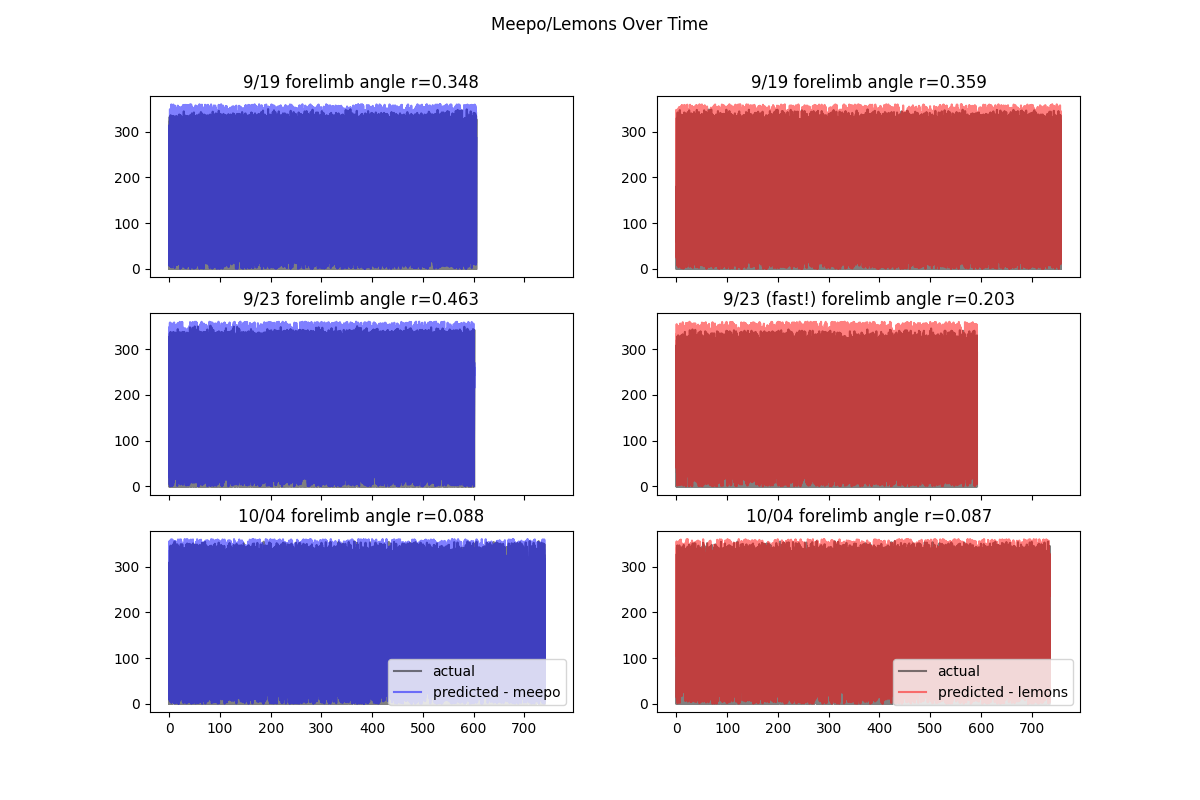

In [6]:
fig512, ax= plt.subplots(3, 2, figsize=(12,8), sharex = True)
fig512.suptitle('Meepo/Lemons Over Time')
ax[0,0].set_title('9/19 forelimb angle r=' + "{0:.3f}".format(mep919_corr[6]))
ax[0,0].plot(mep919_tsf, mep919_act[:,6], c='k', alpha=0.5, label = "actual")
ax[0,0].plot(mep919_tsf, mep919_pred[:,6], c='b', alpha=0.5, label = "predicted")
ax[1,0].set_title('9/23 forelimb angle r=' + "{0:.3f}".format(mep923_corr[6]))
ax[1,0].plot(mep923_tsf, mep923_act[:,6], c='k', alpha=0.5, label = "actual")
ax[1,0].plot(mep923_tsf, mep923_pred[:,6], c='b', alpha=0.5, label = "predicted")
ax[0,1].set_title('9/19 forelimb angle r=' + "{0:.3f}".format(lem919_corr[6]))
ax[0,1].plot(lem919_tsf, lem919_act[:,6], c='k', alpha=0.5, label = "actual")
ax[0,1].plot(lem919_tsf, lem919_pred[:,6], c='r', alpha=0.5, label = "predicted")
ax[1,1].set_title('9/23 (fast!) forelimb angle r=' + "{0:.3f}".format(lem923f_corr[6]))
ax[1,1].plot(lem923f_tsf, lem923f_act[:,6], c='k', alpha=0.5, label = "actual")
ax[1,1].plot(lem923f_tsf, lem923f_pred[:,6], c='r', alpha=0.5, label = "predicted")
ax[2,0].set_title('10/04 forelimb angle r=' + "{0:.3f}".format(mep1004_corr[6]))
ax[2,0].plot(mep1004_tsf, mep1004_act[:,6], c='k', alpha=0.5, label = "actual")
ax[2,0].plot(mep1004_tsf, mep1004_pred[:,6], c='b', alpha=0.5, label = "predicted - meepo")
ax[2,1].set_title('10/04 forelimb angle r=' + "{0:.3f}".format(lem1004_corr[6]))
ax[2,1].plot(lem1004_tsf, lem1004_act[:,6], c='k', alpha=0.5, label = "actual")
ax[2,1].plot(lem1004_tsf, lem1004_pred[:,6], c='r', alpha=0.5, label = "predicted - lemons")
ax[2,1].legend(loc="lower right")
ax[2,0].legend(loc="lower right")
fig512.tight_layout

In [7]:
mep923sxf_pred, mep923sxf_act, mep923sxf_corr = mep923_session.predicted_lines_malleable(h_sinf,h_cosf)
mep923sxf_tsf = np.linspace(0, (mep923sxf_act.shape[0]*50)/1000,mep923sxf_act.shape[0])
mep923fxs_pred, mep923fxs_act, mep923fxs_corr = mep923f_session.predicted_lines_malleable(h_sin,h_cos)
mep923fxs_tsf = np.linspace(0, (mep923fxs_act.shape[0]*50)/1000,mep923fxs_act.shape[0])

In [8]:
alpha0 = mep923f_act[:,3]*u.deg
beta0 = mep923f_pred[:,3]*u.deg
test0 = circcorrcoef(alpha0, beta0)
print(test0)

alpha1 = mep923sxf_act[:,3]*u.deg
beta1 = mep923sxf_pred[:,3]*u.deg
test1 = circcorrcoef(alpha1, beta1)
print(test1)

alpha2 = mep923fxs_act[:,3]*u.deg
beta2 = mep923fxs_pred[:,3]*u.deg
test2 = circcorrcoef(alpha2, beta2)
print(test2)

alpha3 = mep923_act[:,3]*u.deg
beta3 = mep923_pred[:,3]*u.deg
test3 = circcorrcoef(alpha3, beta3)
print(test3)

0.3312719475252569
-0.484435793630886
0.04382627845033896
0.338613637731655


In [12]:
print(lem919_session.tdt_data[0]['fs'])

TypeError: 'int' object is not subscriptable

Text(0.05, 0.7, 'fast decoder')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
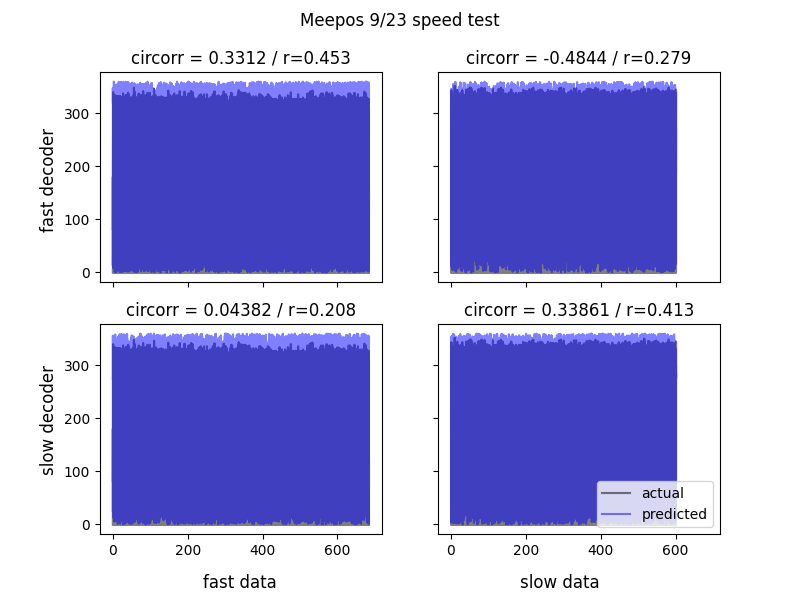

In [9]:
fig512, ax= plt.subplots(2, 2, figsize=(8,6), sharex = True, sharey = True)
fig512.suptitle('Meepos 9/23 speed test')
ax[0,0].set_title('circorr = 0.3312 / r=' + "{0:.3f}".format(mep923f_corr[3]))
ax[0,0].plot(mep923f_tsf, mep923f_act[:,3], c='k', alpha=0.5, label = "actual")
ax[0,0].plot(mep923f_tsf, mep923f_pred[:,3], c='b', alpha=0.5, label = "predicted")
ax[0,1].set_title('circorr = -0.4844 / r=' + "{0:.3f}".format(mep923sxf_corr[3]))
ax[0,1].plot(mep923sxf_tsf, mep923sxf_act[:,3], c='k', alpha=0.5, label = "actual")
ax[0,1].plot(mep923sxf_tsf, mep923sxf_pred[:,3], c='b', alpha=0.5, label = "predicted")
ax[1,0].set_title('circorr = 0.04382 / r=' + "{0:.3f}".format(mep923fxs_corr[3]))
ax[1,0].plot(mep923fxs_tsf, mep923fxs_act[:,3], c='k', alpha=0.5, label = "actual")
ax[1,0].plot(mep923fxs_tsf, mep923fxs_pred[:,3], c='b', alpha=0.5, label = "predicted")
ax[1,1].set_title('circorr = 0.33861 / r=' + "{0:.3f}".format(mep923_corr[3]))
ax[1,1].plot(mep923_tsf, mep923_act[:,3], c='k', alpha=0.5, label = "actual")
ax[1,1].plot(mep923_tsf, mep923_pred[:,3], c='b', alpha=0.5, label = "predicted")
ax[1,1].legend(loc="lower right")
fig512.tight_layout
fig512.text(0.3,.02, 'fast data', ha = 'center', size = 'large')
fig512.text(0.7,0.02, 'slow data', ha = 'center', size = 'large')
fig512.text(0.05,0.3, 'slow decoder', va='center', rotation='vertical', size = 'large')
fig512.text(0.05,0.7, 'fast decoder', va='center', rotation='vertical', size = 'large')

In [10]:
from sklearn.metrics import r2_score

In [11]:
print(r2_score(mep923f_act[:,3], mep923f_pred[:,3]))

print(r2_score(mep923sxf_act[:,3], mep923sxf_pred[:,3]))

print(r2_score(mep923fxs_act[:,3], mep923fxs_pred[:,3]))

print(r2_score(mep923_act[:,3], mep923_pred[:,3]))


-0.1668827230070069
-0.3273266289680834
-0.6079380136669961
-0.21988594812310125


In [9]:
def impulse_response_malleable(H_mat, AOI, full_phase_list, plotting = False):
    column_response = []
    for i in range(0,32):
            product_list = []
            for j in range(0,10):
                dummyarray = np.zeros((10,32))
                dummyarray[-1,i] = 1
                dummyarray = np.roll(dummyarray,-j,axis = 0)
                dummyarray = dummyarray.flatten()
                dummyarray = np.insert(dummyarray,0,1)
                dummyarray = dummyarray.reshape(321,1)
                dummyarray = dummyarray.T
                product = np.dot(dummyarray, H_mat)
                product_list.append(product[0])
            product_list = np.array(product_list)
            column_response.append(product_list)
    av_gait_bins = average_gait_bins(full_phase_list, AOI)
    padded_column_response = []
    if (av_gait_bins - 10) >= 1:
        n = av_gait_bins-10
        for i in range(len(column_response)):
            # padded_column = np.append(column_response[i][:,AOI], np.full((n,1), np.min(column_response[i][:,AOI])))
            padded_column = np.append(column_response[i][:,AOI], np.full((n,1), np.mean(column_response[i][:,AOI])))
            padded_column_response.append(padded_column)
        padded_column_response = np.array(padded_column_response)
    if plotting == True:
        fig1, ax1 = plt.subplots()
        x = np.arange(0,10,1)        
        for i in range(len(column_response)):
            ax1.plot(x, column_response[i][:,AOI])
        ax1.set_xticks(x)
    return padded_column_response

def rates_by_gait_malleable(full_phase_list, rates_array, AOI, resolution, plotting = False):
    phase_list = full_phase_list[:,AOI]
    bins = resolution * average_gait_bins(full_phase_list, AOI)
    step = 360/bins
    rate_storage = []
    for i in range(0, bins):
    # for i in range(0, 1):
        ceil = (i+1)*step
        floor = i*step
        rates_tmp = []
        for j in range(phase_list.shape[0]):   
            if floor <= phase_list[j] < ceil:
                rates_tmp.append(rates_array[i,-32:])
        if not rates_tmp:
            rates_tmp.append(np.zeros(32))
        rates_tmp = np.mean(rates_tmp, axis = 0)
        rate_storage.append(rates_tmp)
    rate_storage = np.array(rate_storage)
    return rate_storage

def average_gait_bins(full_phase_list, AOI):
    gait_lengths = []
    gait_indicies = np.where(full_phase_list[:,AOI]==0)[0]
    for i in range(1, gait_indicies.shape[0]):
        gait_length = gait_indicies[i]-gait_indicies[i-1]
        gait_lengths = np.append(gait_lengths, gait_length)
    av_gait_length = math.ceil(np.average(gait_lengths))
    return av_gait_length

def ratexresponsemap(full_phase_list, rates_array, AOI, H_mat, resolution, channel_range = np.arange(0,32,1), view = '2D'):
    if view == '2D':
        bins = resolution * average_gait_bins(full_phase_list, AOI)
        padded_channel_response = impulse_response_malleable(H_mat, AOI, full_phase_list, plotting=False)
        rates_by_phase = rates_by_gait_malleable(full_phase_list, rates_array, AOI, resolution, plotting = False)
        fig0=plt.figure()
        ax=fig0.add_subplot(111, label="1")
        ax2=fig0.add_subplot(111, label="2", frame_on=False)
        colors = ['coral', 'burlywood','goldenrod','palegreen','paleturquoise','slategray','plum','cadetblue','crimson','chartreuse','gold',
        'blueviolet','darkgreen','fuchsia','orchid', 'forestgreen','royalblue']
        impulse_bins = padded_channel_response[0].shape[0]
        x_values2= np.arange(0,impulse_bins,1) 
        x_values1= np.arange(0,(x_values2[-1]+1)*resolution,1)*350/bins
        x_values3 = np.arange(0,360,1)
        for i in channel_range:
            color_index = i % len(colors)
            peak_incidence = math.floor(np.argmax(rates_by_phase[:,i])/resolution)
            rolled_channel = np.roll(padded_channel_response[i],peak_incidence)
            ax.bar(x_values1, rates_by_phase[:,i],color=colors[color_index], align = 'edge', width = x_values1[1]-x_values1[0], alpha = 0.3)
            ax2.plot(x_values2, rolled_channel, linestyle='--',color=colors[color_index])
        ax.set_xlabel("Phase Angle", color="C0")
        ax.set_ylabel("Spike Rate", color="C0")
        ax.tick_params(axis='x', colors="C0")
        ax.tick_params(axis='y', colors="C0")
        ax2.xaxis.tick_top()
        ax2.yaxis.tick_right()
        ax2.set_ylabel("Impluse Response", color="C1")       
        ax2.xaxis.set_label_position('top') 
        ax2.yaxis.set_label_position('right') 
        ax2.tick_params(axis='x', colors="white")
        ax2.tick_params(axis='y', colors="C1")
        ax.set_xlim([0,360])
        plt.show()
    if view == '3D':
        bins = resolution * average_gait_bins(full_phase_list, AOI)
        padded_channel_response = impulse_response_malleable(H_mat, AOI, full_phase_list, plotting=False)
        rates_by_phase = rates_by_gait_malleable(full_phase_list, rates_array, AOI, resolution, plotting = False)
        fig = plt.figure(figsize=(16,9))
        ax = fig.add_subplot(121, projection='3d')
        ax2 = fig.add_subplot(122, projection='3d')
        impulse_bins = padded_channel_response[0].shape[0]
        x_values2= np.arange(0,impulse_bins,1) 
        x_values1= np.arange(0,(x_values2[-1]+1)*resolution,1)*350/bins
        colors = ['coral', 'burlywood','goldenrod','palegreen','paleturquoise','slategray','plum','cadetblue','crimson','chartreuse','gold',
        'blueviolet','darkgreen','fuchsia','orchid', 'forestgreen','royalblue']
        if type(channel_range) == list:
            for i in channel_range:
                color_index = i % len(colors)
                peak_incidence = math.floor(np.argmax(rates_by_phase[:,i])/resolution)
                rolled_channel = np.roll(padded_channel_response[i],peak_incidence)
                ax2.plot(x_values2,rolled_channel, zs=channel_range.index(i), linestyle='--',zdir='y',color=colors[color_index])
                ax.bar(x_values1, rates_by_phase[:,i], zs=channel_range.index(i), width=x_values1[1]-x_values1[0], align = 'edge', zdir='y', color=colors[color_index], alpha=0.75)
            ax.set_xlabel("Phase Angle", color="C0")
            ax.set_zlabel("Spike Rate", color="C0")
            ax.set_ylabel("Channel", color="C0")
            ax2.set_zlabel("Impluse Response", color="C0")      
            ax2.set_ylabel("Channel", color="C0")
            ax.set_yticks([])
            ax2.tick_params(axis='y', colors="white")
            ax.set_xlim([0,360])
            plt.show()
            
        else:    
            for i in channel_range:
                color_index = i % len(colors)
                peak_incidence = math.floor(np.argmax(rates_by_phase[:,i])/resolution)
                rolled_channel = np.roll(padded_channel_response[i],peak_incidence)
                ax2.plot(x_values2,rolled_channel, zs=channel_range[i], linestyle='--',zdir='y',color=colors[color_index])
                ax.bar(x_values1, rates_by_phase[:,i], zs=channel_range[i], width=x_values1[1]-x_values1[0], align = 'edge', zdir='y', color=colors[color_index], alpha=0.75)
            ax.set_xlabel("Phase Angle", color="C0")
            ax.set_zlabel("Spike Rate", color="C0")
            ax.set_ylabel("Channel", color="C0")
            ax2.set_zlabel("Impluse Response", color="C0")      
            ax2.set_ylabel("Channel", color="C0")
            ax.set_yticks([])
            ax2.tick_params(axis='y', colors="white")
            ax.set_xlim([0,360])
            plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
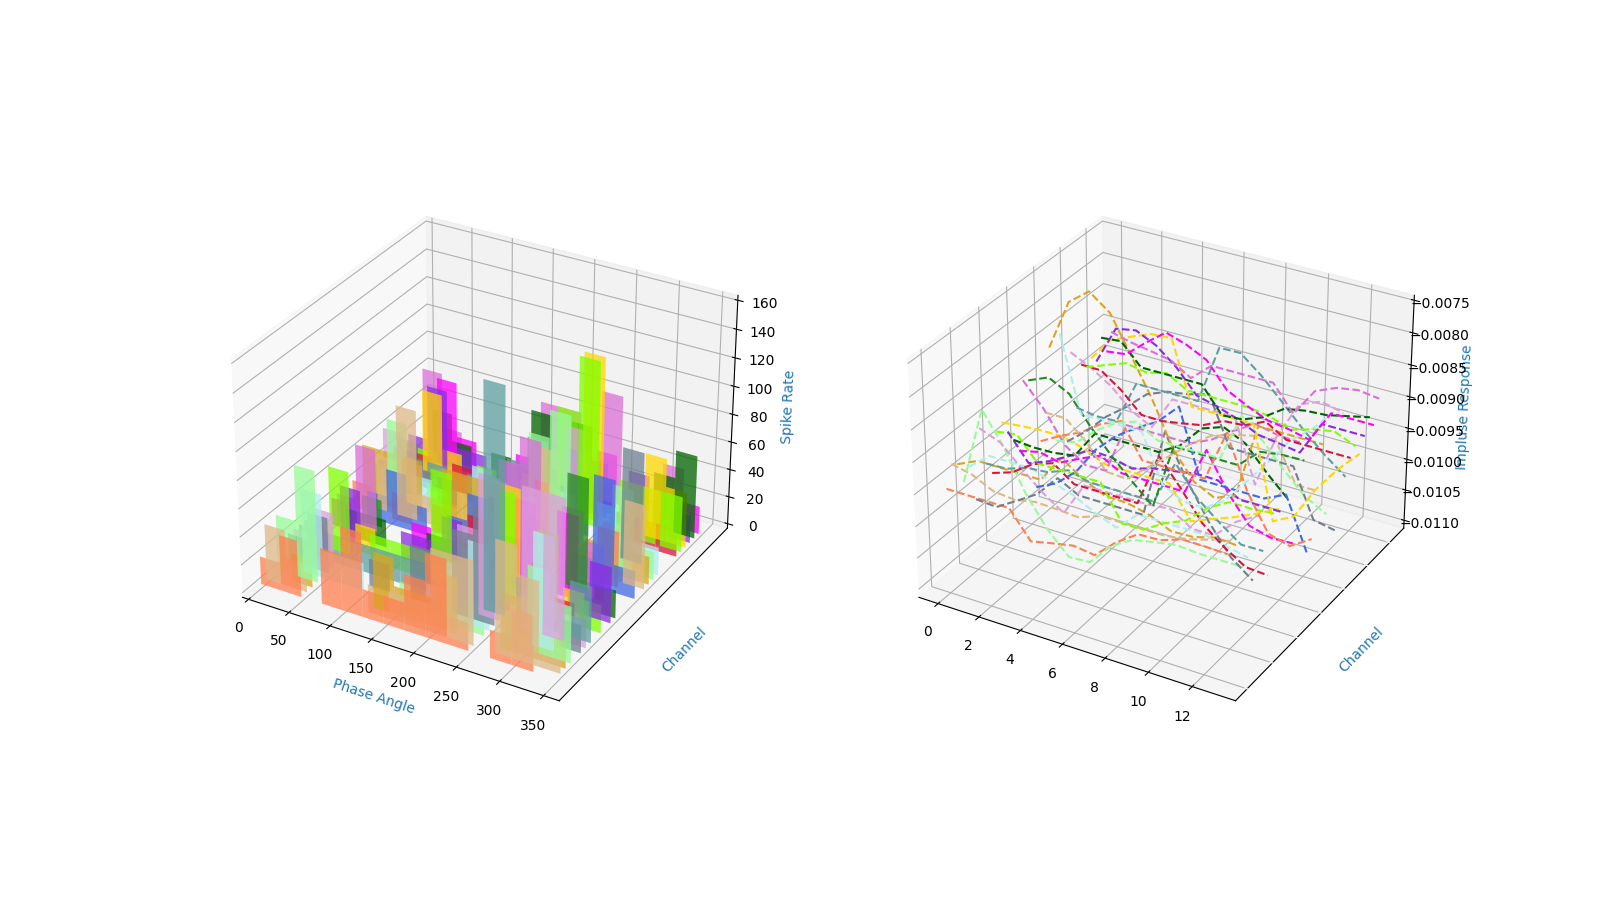

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
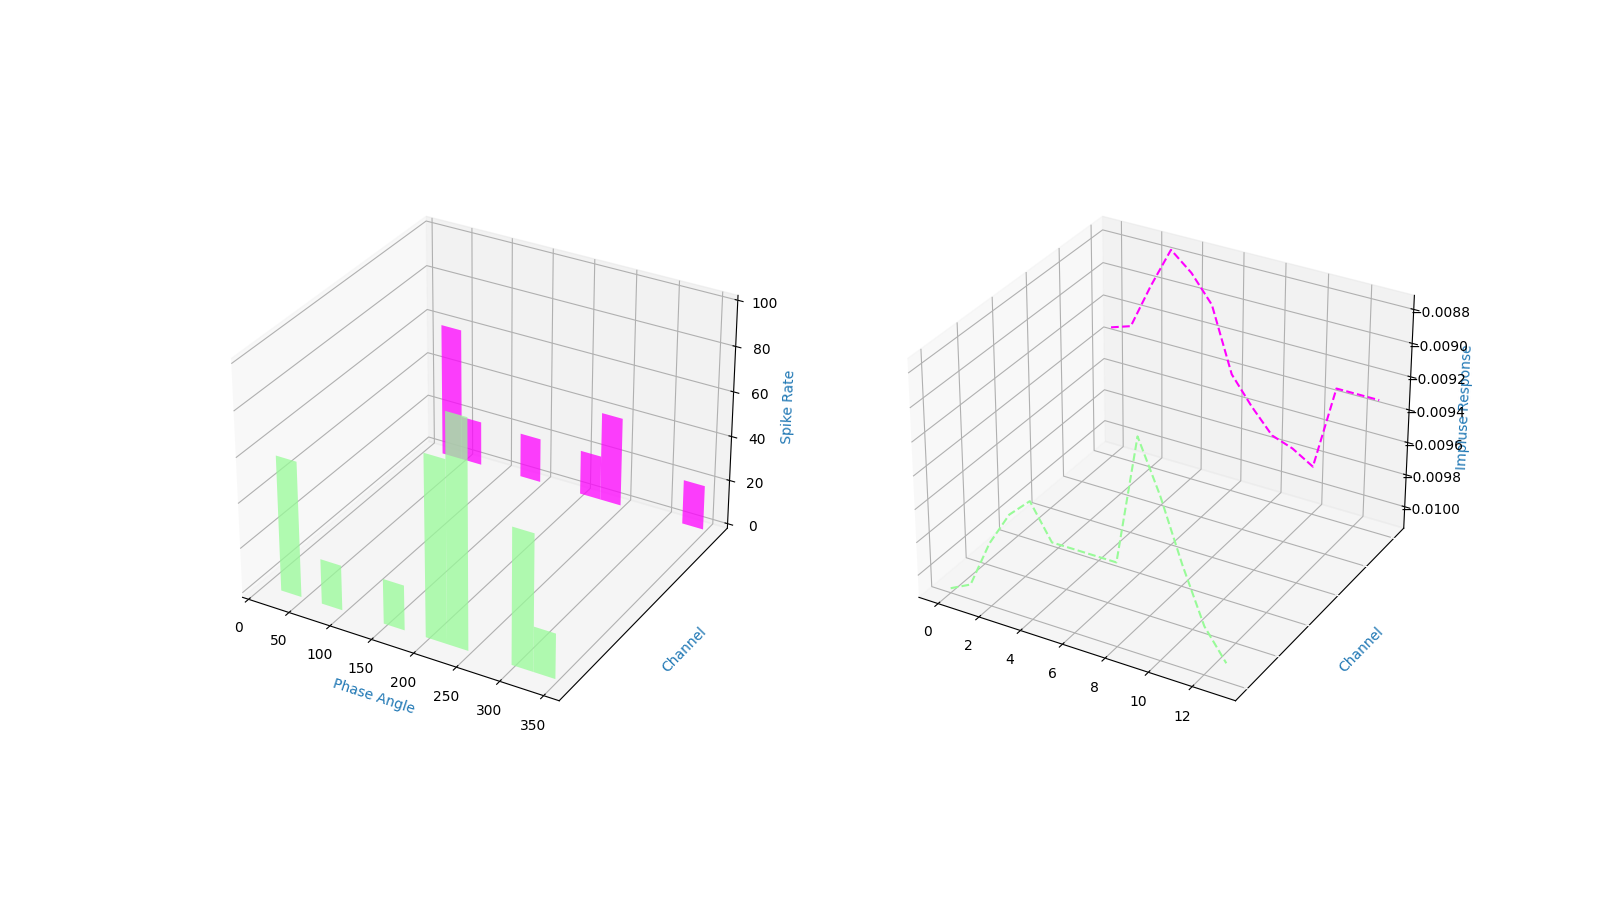

In [10]:
full_phase_list = mep919_act
rates_array, _ = mep919_session.stitch_and_format()
AOI = 3
H_mat = mep919_session.get_H(H='cos')
resolution = 1
ratexresponsemap(full_phase_list, rates_array, AOI, H_mat, resolution, view = '3D')
ratexresponsemap(full_phase_list, rates_array, AOI, H_mat, resolution, channel_range = [20, 30], view = '3D')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
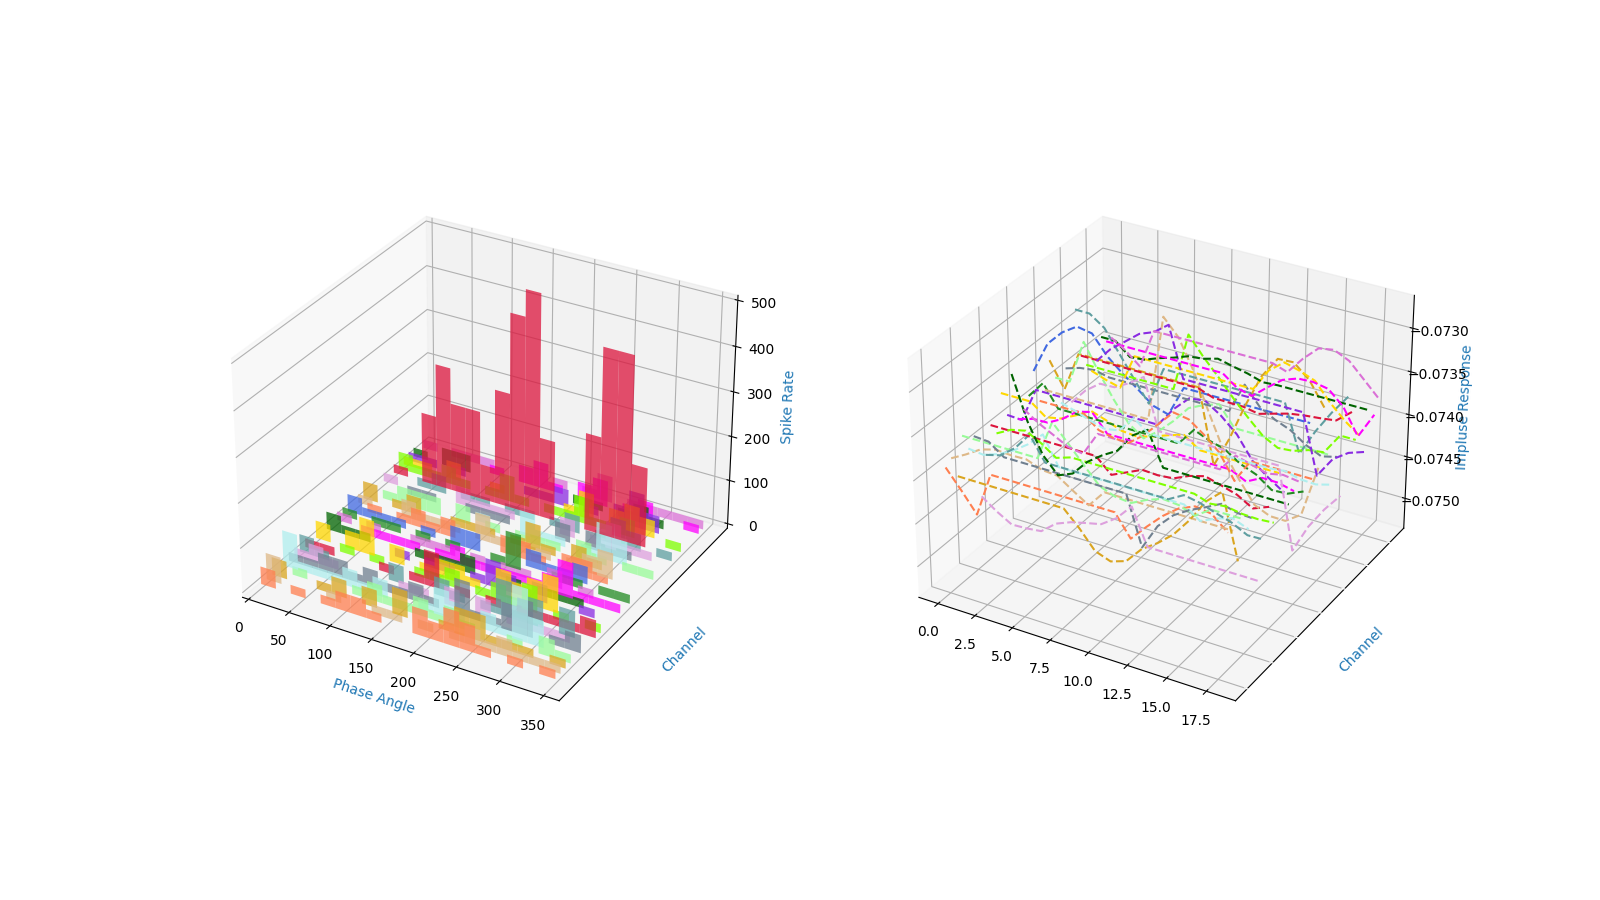

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
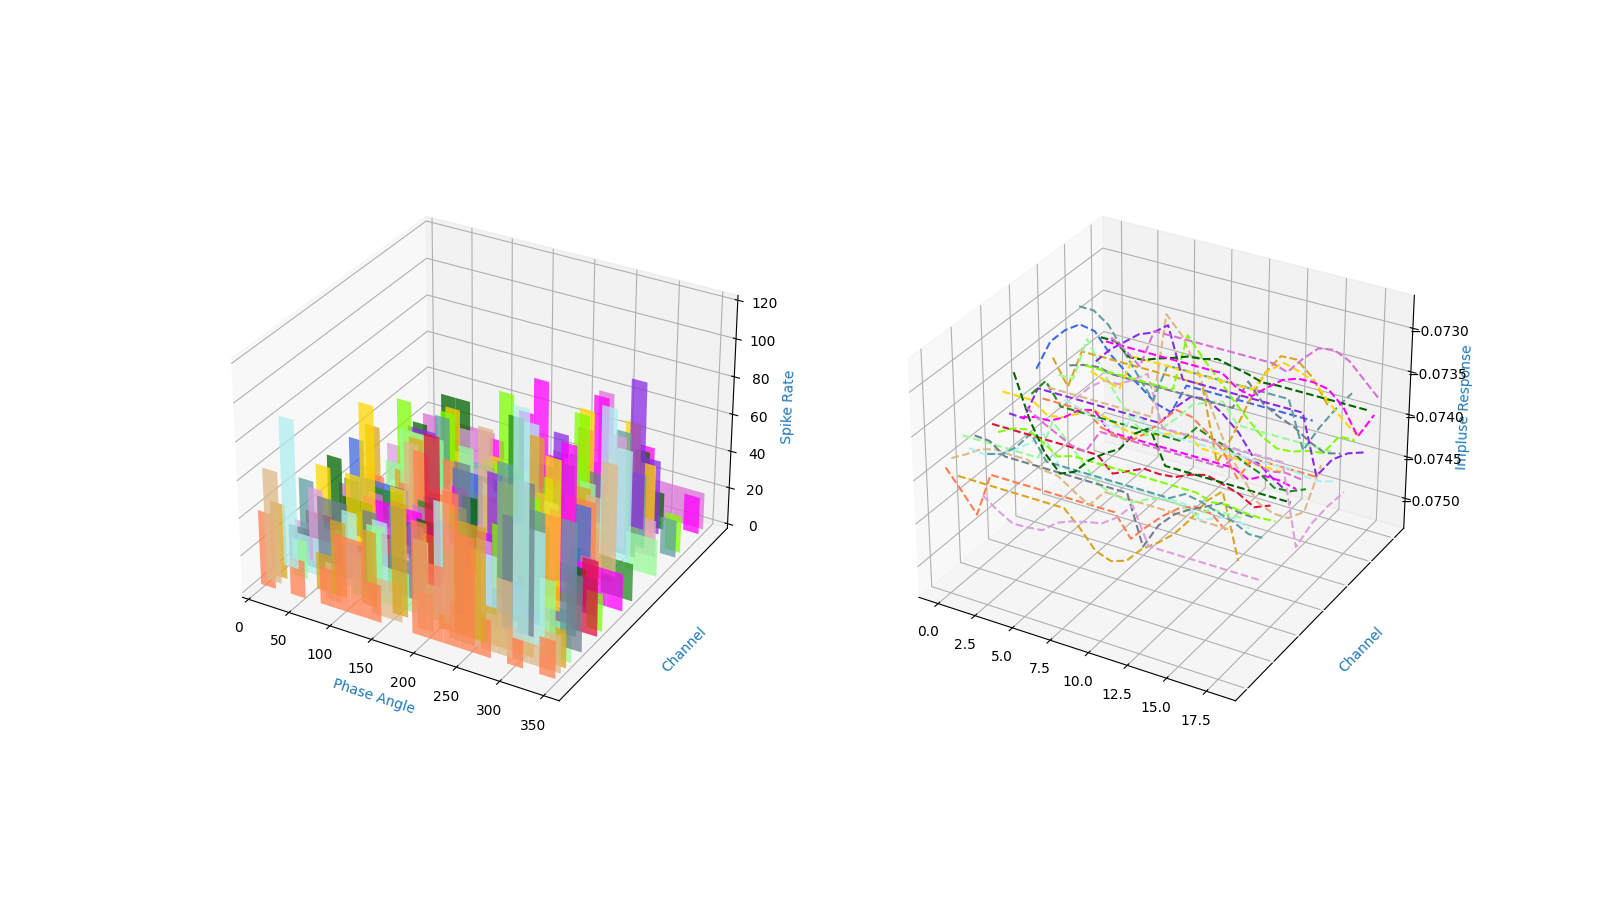

In [11]:
full_phase_list_i = mep1004_act
rates_array_i, _ = mep1004_session.stitch_and_format()
AOI = 6
H_mat_i = mep1004_session.get_H(H='cos')
resolution = 1
ratexresponsemap(full_phase_list_i, rates_array_i, AOI, H_mat_i, resolution, view = '3D')
ratexresponsemap(full_phase_list_i, rates_array_i, AOI, H_mat_i, resolution, channel_range = list(np.hstack((np.arange(0,25,1),np.arange(26,32,1)))), view = '3D')